In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy import wcs

In [8]:
df = pd.read_csv('Data_Files/Galaxies.csv')

In [10]:
df['ra'].min(), df['ra'].max(), df['dec'].min(), df['dec'].max()

(97.64458333, 98.16166667, -56.37120051, -56.0125855)

In [13]:
step=1/60
my_ra = np.arange(df['ra'].min(), df['ra'].max(), step)
my_dec = np.arange(df['dec'].min(), df['dec'].max(), step)

In [23]:
density = np.zeros((len(my_ra), len(my_dec)))
for i in range(len(my_ra)):
    for j in range(len(my_dec)):
        #my_coords = SkyCoord(ra=my_ra[i], dec=my_dec[j], unit='deg', frame='icrs')
        #sep = scatter_coords.separation(my_coords)
        #mask = sep < (step)*u.deg
        mask = (df['ra']<=(my_ra[i]+step/2)) & (df['ra']>=my_ra[i]-step/2) & (df['dec']<=my_dec[j]+step/2) & (df['dec']>=my_dec[j]-step/2)
        #print(mask.sum())
        density[i,j] = mask.sum()

In [24]:
ra_size, dec_size = my_ra.shape[0], my_dec.shape[0]

In [25]:
w2 = wcs.WCS(naxis=2)
w2.wcs.crpix = [ra_size/2, dec_size/2]
w2.wcs.cdelt = np.array([(my_ra[1]-my_ra[0]), (my_dec[1]-my_dec[0])])
w2.wcs.crval = [my_ra[int(ra_size/2)], my_dec[int(dec_size/2)]]
w2.wcs.ctype = ["RA---SIN", "DEC--SIN"]
w2.wcs.cunit = ["deg", "deg"]
w2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 97.91124999666665  -56.18786717666668  
CRPIX : 16.0  11.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.01666666666666572  0.01666666666666572  
NAXIS : 0  0

In [26]:
ra_l, ra_h = df['ra'].min(), df['ra'].max()
dec_l, dec_h = df['dec'].min(), df['dec'].max()
ra = np.linspace(ra_l, ra_h, 100)
dec = np.linspace(dec_l, dec_h, 100)

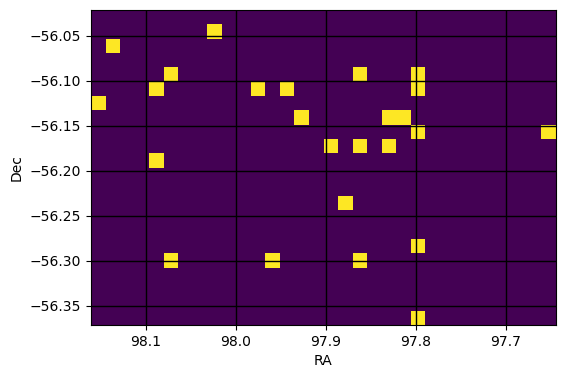

In [27]:
fig = plt.figure(1, figsize=(6, 6))
ax0 = plt.subplot()
a=ax0.imshow(density.T, extent=[my_ra[0], my_ra[-1], my_dec[-1], my_dec[0]])
#ax0.plot(ra, [dec_l]*100, color='red', lw=2, linestyle='--')
#ax0.plot(ra, [dec_h]*100, color='red', lw=2, linestyle='--')
#ax0.plot([ra_l]*100, dec, color='red', lw=2, linestyle='--')
#ax0.plot([ra_h]*100, dec, color='red', lw=2, linestyle='--')

#ax0.scatter(df['ra'],df['dec'], s=1, color='red', alpha=0.5, transform=ax0.get_transform('icrs'))

#ax0.set_xlim(ra_size, 0)
#ax0.set_ylim(-5, dec_size)
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')
ax0.grid(color='black', lw=1)
ax0.invert_xaxis()
ax0.invert_yaxis()

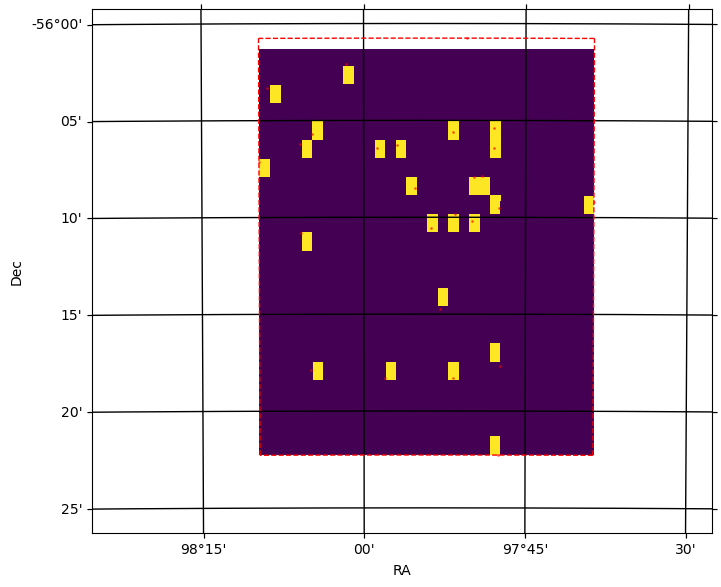

In [28]:
fig = plt.figure(1, figsize=(8, 8))
ax0 = plt.subplot(projection=w2)
ra_ax = ax0.coords[0]
ra_ax.set_format_unit(unit='degree')
a=ax0.imshow(density.T, extent=[my_ra[0], my_ra[-1], my_dec[0], my_dec[-1]], 
             transform=ax0.get_transform('icrs'))
#ax0.contour(gaussian_filter(density.T, 1), extent=[my_ra[0], my_ra[-1], my_dec[0], my_dec[-1]],
#            transform=ax0.get_transform('icrs'), colors='green', levels=np.logspace(-1, 1.672, 6))
ax0.plot(ra, [dec_l]*100, color='red', lw=1, transform=ax0.get_transform('icrs'), linestyle='--')
ax0.plot(ra, [dec_h]*100, color='red', lw=1, transform=ax0.get_transform('icrs'), linestyle='--')
ax0.plot([ra_l]*100, dec, color='red', lw=1, transform=ax0.get_transform('icrs'), linestyle='--')
ax0.plot([ra_h]*100, dec, color='red', lw=1, transform=ax0.get_transform('icrs'), linestyle='--')


ax0.scatter(df['ra'],df['dec'], s=1, color='red', alpha=0.5, transform=ax0.get_transform('icrs'))

ax0.set_xlim(0, ra_size)
ax0.set_ylim(-5, dec_size)
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')
ax0.grid(color='black', lw=1)
ax0.invert_xaxis()